In [1]:
from sklearn.datasets import fetch_mldata

from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_mldata('MNIST original')
mnist

C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
mnist=fetch_mldata('MNIST original')
(train_data,test_data,train_labels,test_labels)=train_test_split(np.array(mnist.data), mnist.target,
                                                                 test_size=0.25, random_state=1234)
print(len(train_data))
print(len(test_data))

52500
17500


C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\1-10\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


#### 0~9까지 데이터가 다 들어있는지 확인
실제로 우리가 학습시킬 데이터가 0~9까지 다 제대로 들어있는 데이터인지 확인

In [5]:
print(np.unique(train_labels))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


#### 학습 시키려는

In [6]:
# Method 01) numpy의 unique 이용해서 처리
unique, counts = np.unique(train_labels, return_counts=True)
print(np.asarray((unique,counts)).T)
# 대략 5000개를 중심으로 고르게 분포

[[0.000e+00 5.166e+03]
 [1.000e+00 5.894e+03]
 [2.000e+00 5.282e+03]
 [3.000e+00 5.280e+03]
 [4.000e+00 5.131e+03]
 [5.000e+00 4.743e+03]
 [6.000e+00 5.171e+03]
 [7.000e+00 5.502e+03]
 [8.000e+00 5.154e+03]
 [9.000e+00 5.177e+03]]


#### 실제 데이터 값을 이미지로 확인
실제 내용을 보면 원래 데이터는 28x28 크기의 이미지로 이루어진 것을 알 수 있다. 다만 우리가 받아들이고 데이터화 하는 과정에서 label이 부여되어있고 처리를 위해서 matrix가 아닌 28x28 크기의 1차원 array로 처리가 된 것을 볼 수 있다

In [7]:
import seaborn as sns


In [8]:
# 이미 앞에서 label은 분리하였으니 순수 데이터에서 크기 부분을 확인하자
print(train_data[0].shape) # 28 * 28 = 784
print(np.sqrt(train_data[0].shape))

(784,)
[28.]


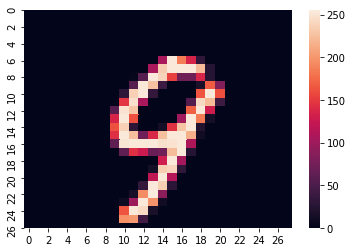

In [9]:
# 보고자 하는 데이터의 index
idx=0
image_data=train_data[idx]

# 1차원이기 때문에 실제 값을 계산하기 위해서는 1차원의 길이값 획득 & 이를 제곱근으로 변환
tot_size=image_data.shape[0]
one_size=int(np.sqrt(tot_size))

# 그림으로 표현
sns.heatmap(np.reshape(image_data, (one_size, one_size)))
#plt.title(str("MNIST Digit Image_ Train Data Number: ") + str(idx))

#### Normalization-Max/Min method
new x = (x - x_min)/(x_max - x_min)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
min_max_scaler=MinMaxScaler()
train_norm=min_max_scaler.fit_transform(train_data) # 주어진 데이터에 맞춰 fitting해서 train data를 변형
test_norm=min_max_scaler.fit_transform(test_data) 
# train과 test를 함께 mix_max를 적용시켜야함

#### 기본 분석 시작
* 참고로 데이터의 수가 많기 때문에 한 번 수행하는데 시간이 상당히 소요되니 시간에 대한 부분을 잘 생각할 것!
* 참고) n_jobs : int, optional(default=1)

In [12]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [13]:
t1=time.time()
# instantiate learning model ( k=3 ) -> train data 57500개 전체를 학습
# n_jobs = -1 하지 않으면 시간이 많이 걸리게 된다
knn=KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# fitting the model - 모델 학습
knn.fit(train_data, train_labels)

# predict the model - 예측
pred=knn.predict(test_data)

t2=time.time()
print("Process Time : " + str(t2-t1))

# evaluate accuracy
print(accuracy_score(test_labels, pred))

Process Time : 178.06266570091248
0.9718857142857142


In [14]:
t1=time.time()
mylist=list(range(1,10))

neighbors=filter(lambda x : x%2 != 0, mylist)

# empty list that will hold cv scores
cv_scores=[]

# perform 10-fold cross validation
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    scores=cross_val_score(knn, train_data, train_labels, cv=10, scoring='accuracy') #  train data를 10세트로 나눈 후 k값 1에 대해서 10번 수행하면서 정확도 측정
    cv_scores.append(scores.mean())
    print(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors K')
plt.ylabel('Misclassification Error')
plt.show()                                                              
t2=time.time()
print("Process Time : " + str(t2-t1))

0.9712186538205725
0.9714660951214116
0.9701332546666194
0.9691615104010239
0.9672760819527358


TypeError: 'filter' object is not subscriptable

#### with PCA - 주성분분석

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
num_comp=40
pca=PCA(n_components=num_comp)

In [ ]:
pca.fit(train_data)

In [ ]:
# determine amount of variance explained by components
np.sum(pca.explained_variance_ratio_)

In [ ]:
# plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Component')
plt.show()

In [ ]:
# extract the features
train_ext=pca.fit_transform(train_data) # 특정행렬을 낮은 차원의 근사행렬로 변환
print(train_ext.shape)

In [ ]:
# transform the test data using the existing parameters
test_ext=pca.transform(test_data)
print(test_ext.shape)

In [ ]:
min_max_scaler=MinMaxScaler()

In [ ]:
train_norm=min_max_scaler.fit_transform(train_ext)
test_norm=min_max_scaler.fit_transform(test_ext)

In [ ]:
knn=KNeighborsClassifier()
knn.fit(train_norm, train_labels)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 시간 오래 걸림
cross_val_score(knn,train_norm,train_labels, cv=5)

* 위의 기본 세팅에서도 거의 97%의 결과가 나타났는데, PCA로 성분을 줄이면 오히려 더 좋은 성능이나, 적은 데이터로 유사한 성능을 확보할 수 있다
* 이와 같은 방법을 주로 사용하는 이유는 knn은 상당히 심플하면서도 성능이 좋은 알고리즘인데, 문제를 차원의 저주에 걸리면 상당한 성능저하를 야기하고 있다. 그래서 기본적으로 많은 사람들이 PCA나 DT등 여러가지 방법을 활용하여서 차원 축소를 하고 적용을 하는 경우가 많음